In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\Srividya\Downloads\airplane-passengers.csv")
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<Axes: >

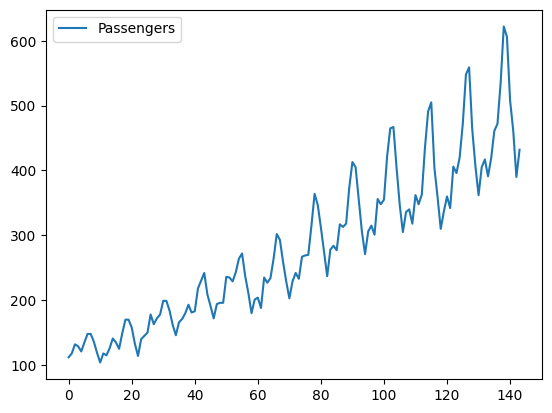

In [7]:
data.plot()

In [8]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

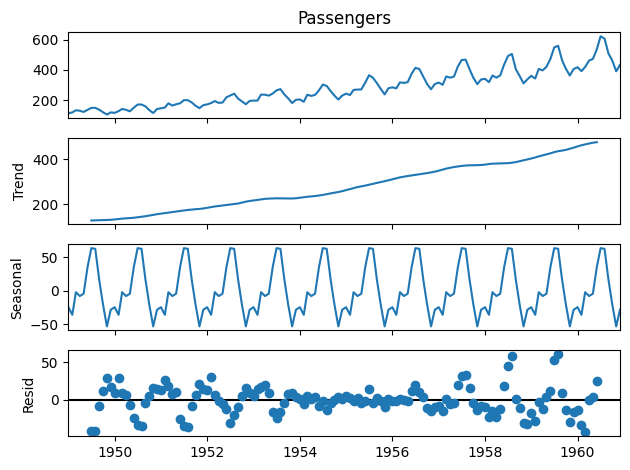

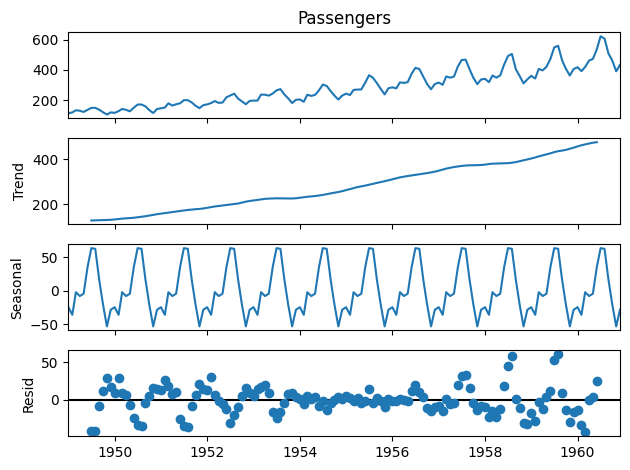

In [10]:
# Convert Month to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Ensure monthly frequency
data = data.asfreq('MS')

# Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Passengers'], model='additive', period=12)
result.plot()


In [11]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


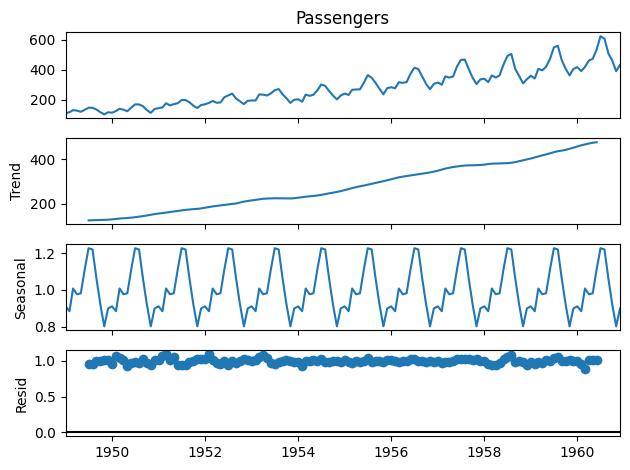

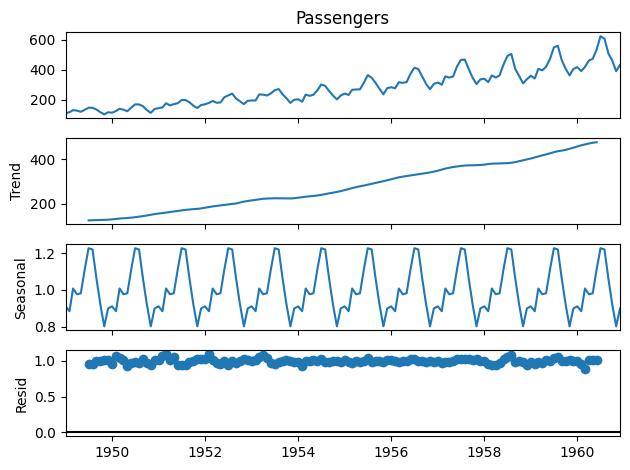

In [13]:
result = seasonal_decompose(data['Passengers'], model='multiplicative')
result.plot()


In [14]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller
#define function for ADF test
result=adfuller(data["Passengers"])
result

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [15]:
# Defining a function to use ADF test

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-values', '#Lags Used', 'Number of observations used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

adfuller_test(data['Passengers'])



ADF Test Statistic : 0.8153688792060463
p-values : 0.991880243437641
#Lags Used : 13
Number of observations used : 130
The data is not stationary


In [16]:
help(data.diff)

Help on method diff in module pandas.core.frame:

diff(periods: 'int' = 1, axis: 'Axis' = 0) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    First discrete difference of element.
    
    Calculates the difference of a DataFrame element compared with another
    element in the DataFrame (default is element in previous row).
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for calculating difference, accepts negative
        values.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Take difference over rows (0) or columns (1).
    
    Returns
    -------
    DataFrame
        First differences of the Series.
    
    See Also
    --------
    DataFrame.pct_change: Percent change over given number of periods.
    DataFrame.shift: Shift index by desired number of periods with an
        optional time freq.
    Series.diff: First discrete difference of object.
    
    Notes
    -----
    For boolean dtypes, this uses :m

In [17]:
airline_diff = data.diff(periods=1)
airline_diff.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [18]:
adfuller_test(airline_diff['Passengers'].dropna())

ADF Test Statistic : -2.8292668241699923
p-values : 0.054213290283826474
#Lags Used : 12
Number of observations used : 130
The data is not stationary


<Axes: xlabel='Month'>

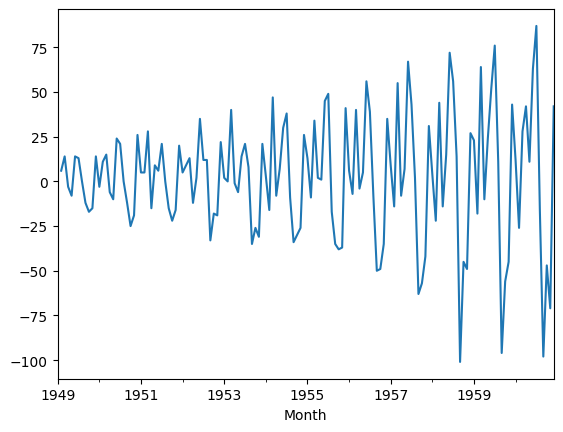

In [19]:
airline_diff['Passengers'].plot()


p value is still higher and not stationary mean is constant and variance is not constant so do second order differentiation

In [20]:
# another order of differencing
airline_diff2 = airline_diff.diff(periods=1)
airline_diff2.head()


,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0


In [21]:
adfuller_test(airline_diff2['Passengers'].dropna())

ADF Test Statistic : -16.384231542468516
p-values : 2.7328918500141235e-29
#Lags Used : 11
Number of observations used : 130
The data is stationary


In [22]:
df = pd.DataFrame({'a':[1, 2, 3, 4, 5, 6],
                       'b':[1, 2, 3, 5, 8,9],
                       'c':[1, 4, 9, 16, 25, 36]})   #examples

In [23]:
df.diff()

,a,b,c
0,NaN,NaN,NaN
1,1.0,1.0,3.0
2,1.0,1.0,5.0
3,1.0,2.0,7.0
4,1.0,3.0,9.0
5,1.0,1.0,11.0


In [24]:
df.diff(axis=1)

,a,b,c
0,NaN,0,0
1,NaN,0,2
2,NaN,0,6
3,NaN,1,11
4,NaN,3,17
5,NaN,3,27


do regular differencing that is value of d and then check adf for stationarity check.if data is stationary then only we can build time series models

<Axes: xlabel='Month'>

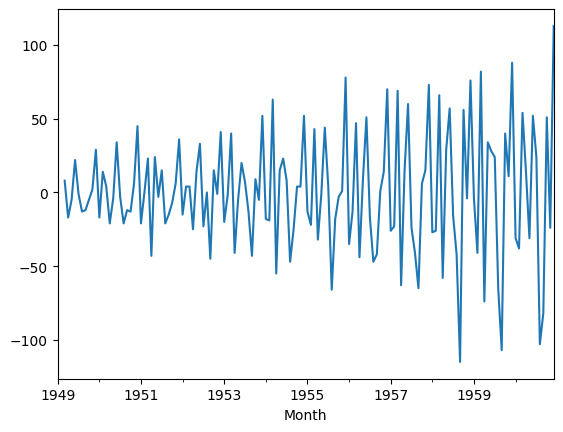

In [25]:
airline_diff2['Passengers'].plot()

now mean and variance is constant on both positive and negative sides.data is stationary now lets build MA model .

In [26]:
#find acf and pacf plot to find q and p value .here we build ma model so we find q value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

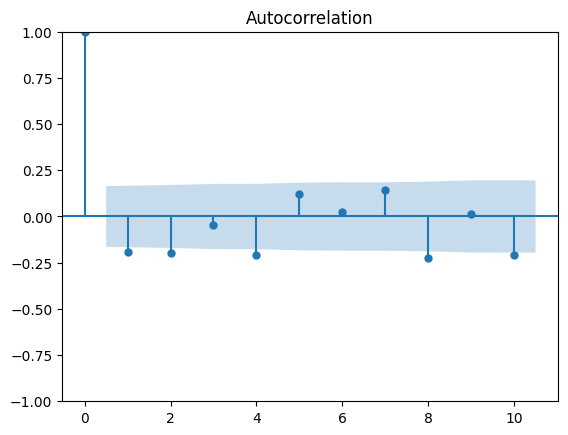

In [27]:
plot_acf(airline_diff2['Passengers'].dropna(),lags=10)
plt.show()

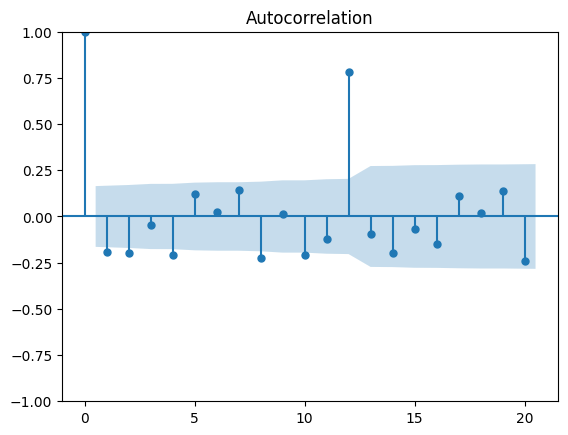

In [28]:
#now q value can be taken as 2 for ARIMA model s order 
plot_acf(airline_diff2['Passengers'].dropna(),lags=20)
plt.show()

In [29]:
#model building
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Passengers'], order=(0,2,2))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -694.186
Date:                Mon, 08 Dec 2025   AIC                           1394.373
Time:                        23:48:04   BIC                           1403.240
Sample:                    01-01-1949   HQIC                          1397.976
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5927      1.677     -0.354      0.724      -3.879       2.693
ma.L2         -0.4067      0.710     -0.573      0.567      -1.798       0.985
sigma2      1000.6515   1734.158      0.577      0.5

In [30]:
forecast = model_fit.forecast(steps=12)   # next 12 months
print(forecast)


1961-01-01    461.626755
1961-02-01    464.052583
1961-03-01    466.478412
1961-04-01    468.904240
1961-05-01    471.330068
1961-06-01    473.755897
1961-07-01    476.181725
1961-08-01    478.607554
1961-09-01    481.033382
1961-10-01    483.459211
1961-11-01    485.885039
1961-12-01    488.310867
Freq: MS, Name: predicted_mean, dtype: float64


In [31]:
#check values for p,d,q for which AIC is lowest
p=0
d=2
q=1

In [32]:
pdq = []
aic = []

for q in range(1, 6):
    try:
        model = ARIMA(airline_diff2['Passengers'], order=(0,2,q))
        model_fit = model.fit()
        x = (0, 2, q)
        pdq.append(x)
        aic.append(model_fit.aic)
    except:
        pass

keys = pdq
values = aic
d = dict(zip(keys, values))
print(d)


{(0, 2, 1): 1588.5505546694867, (0, 2, 2): 1482.333590670207, (0, 2, 3): 1455.7995893486454, (0, 2, 4): 1436.7056563664282, (0, 2, 5): 1475.6174931014516}


In [33]:
#for order of(0,2,4) AIC value is least value is 1436 hence build model at this order of ARIMA

In [34]:
model = ARIMA(data['Passengers'], order=(0,2,4))
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 2, 5)   Log Likelihood                -731.809
Date:                Mon, 08 Dec 2025   AIC                           1475.617
Time:                        23:48:05   BIC                           1493.352
Sample:                    01-01-1949   HQIC                          1482.824
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.8546      0.113    -25.295      0.000      -3.076      -2.633
ma.L2          1.7133      0.289      5.921      0.000       1.146       2.280
ma.L3          1.9909      0.424      4.700      0.0

In [35]:
model_fit.aic

1475.6174931014516

In [36]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

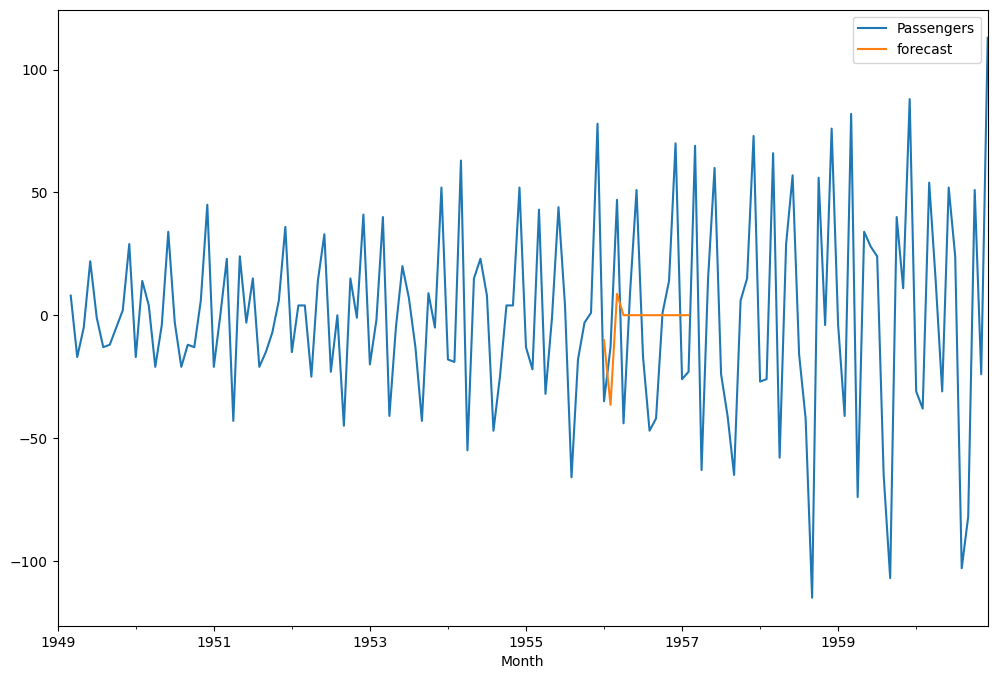

In [37]:

# predicting values for this model
airline_diff2['forecast'] = model_fit.predict(start=84, end=97, dynamic=True)

# plot both actual and forecast
airline_diff2[['Passengers', 'forecast']].plot(figsize=(12,8))


<Axes: xlabel='Month'>

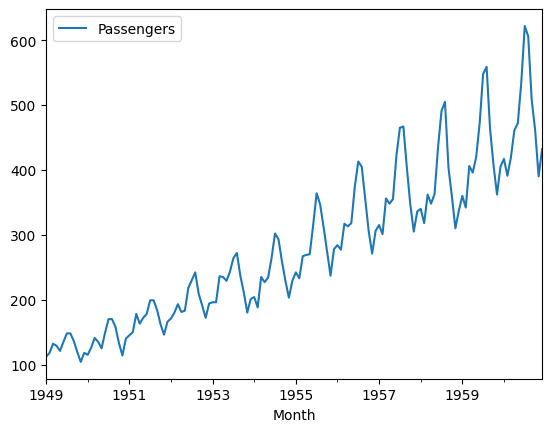

In [38]:
data.plot()

<Axes: xlabel='Month'>

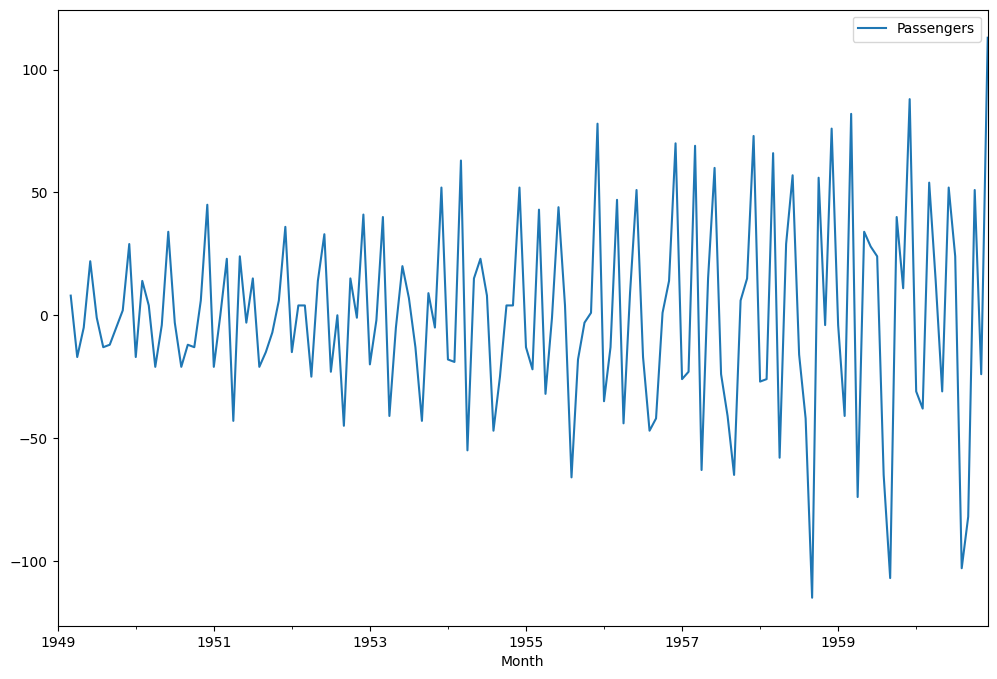

In [39]:
airline_diff2[['Passengers']].plot(figsize=(12,8))

In [40]:
#forecasting future values
from pandas.tseries.offsets import DateOffset
future_dates = [airline_diff2.index[-1] + DateOffset(months=x) for x in range(0, 24)]
len(future_dates)

24

In [41]:
import pandas as pd

In [42]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=airline_diff2.columns)
future_dates_df

,Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [43]:
future_df=pd.concat([airline_diff2,future_dates_df],axis=0)
future_df.shape

(167, 2)

In [44]:
future_df.tail()

,Passengers,forecast
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


<Axes: xlabel='Month'>

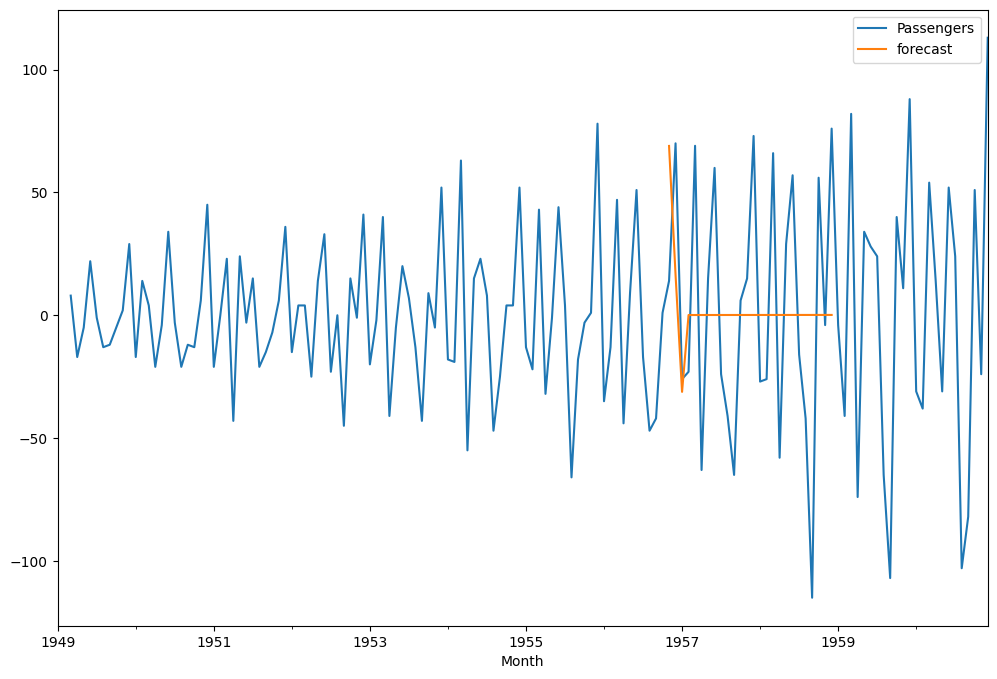

In [45]:

# predicting values for this model
airline_diff2['forecast'] = model_fit.predict(start=94, end=119, dynamic=True)

# plot both actual and forecast
airline_diff2[['Passengers', 'forecast']].plot(figsize=(12,8))


In [46]:
#so far we built ARIMA MODEL NOW LETS BUILD SARIMAX MODEL TO PREDICT VALUES
import statsmodels.api as sm


In [47]:
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(0,2,4),seasonal_order=(0,2,4,12))
results=model.fit()
#the optimizer didn’t properly converge.”

C:\Users\Srividya\Anaconda3\envs\chatbotenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model = sm.tsa.statespace.SARIMAX(
    data['Passengers'],
    order=(0, 1, 1),          # non-seasonal (p,d,q)
    seasonal_order=(0, 1, 1, 12)  # seasonal (P,D,Q,s)
)
results = model.fit()
print(results.summary())
#d=1 and D=1 are usually enough. Your (0,2,4) + (0,2,4,12) is very heavy differencing and high MA order, which often causes convergence problems.

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -507.501
Date:                            Mon, 08 Dec 2025   AIC                           1021.003
Time:                                    23:52:51   BIC                           1029.628
Sample:                                01-01-1949   HQIC                          1024.507
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3087      0.068     -4.507      0.000      -0.443      -0.174
ma.S.L12      -0.1075      0.091   

<Axes: xlabel='Month'>

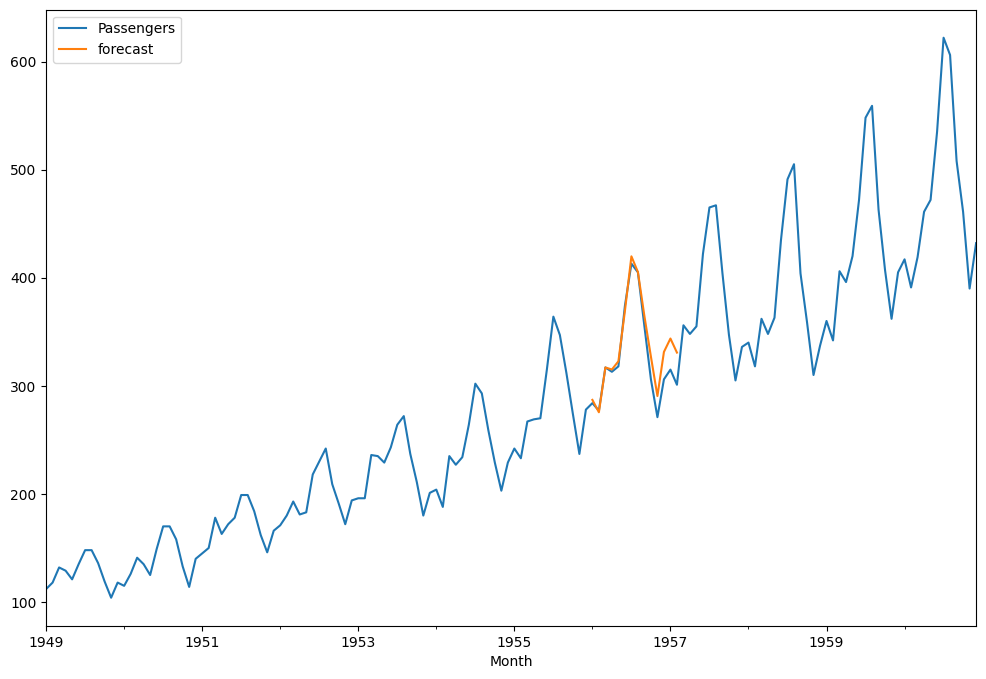

In [50]:
data['forecast']=results.predict(start=84,end=97,dynamic=True)
data[['Passengers','forecast']].plot(figsize=(12, 8))


In [ ]:
#acf and pcf plots auto correlation and partial auto correlation plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(airline_diff2['Passengers'].dropna(),lags=10)
plt.show()

In [52]:
#SARIMAX FORECAST VALUES IS VERY SIMILAR TO ACTUAL VALUES
#forecasting future values
from pandas.tseries.offsets import DateOffset
future_dates = [airline_diff2.index[-1] + DateOffset(months=x) for x in range(0, 24)]
len(future_dates)

24

In [53]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=data.columns)
future_dates_df

,Passengers,forecast
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN
1961-06-01,NaN,NaN
1961-07-01,NaN,NaN
1961-08-01,NaN,NaN
1961-09-01,NaN,NaN
1961-10-01,NaN,NaN


In [54]:
future_df=pd.concat([data,future_dates_df],axis=0)
future_df.shape  
#concatenated and predicted with non stationary data

(167, 2)

In [55]:
future_df.tail()

,Passengers,forecast
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


<Axes: >

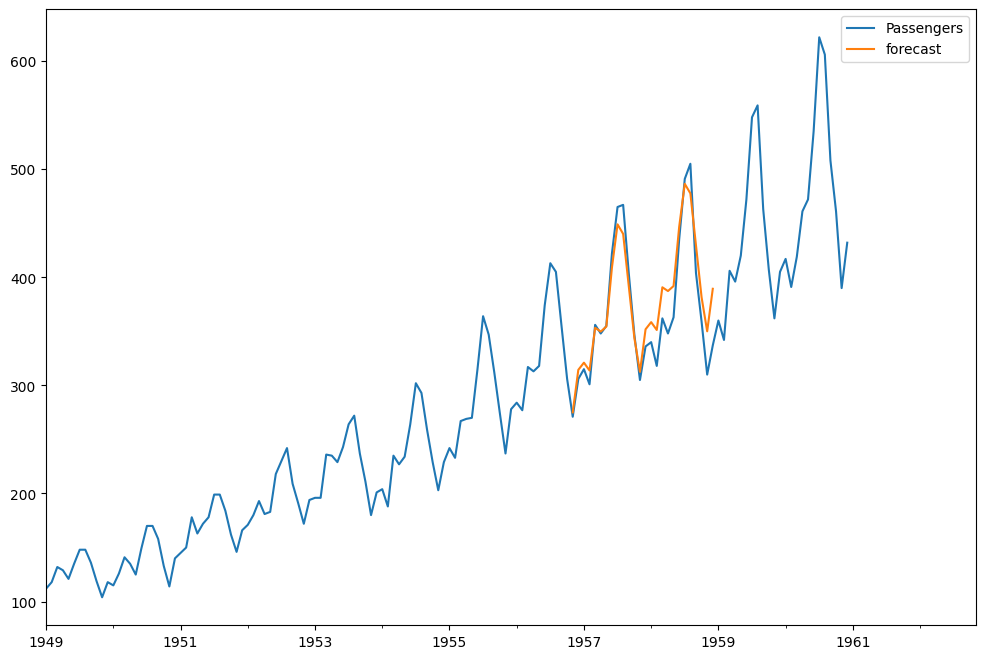

In [56]:
future_df['forecast']=results.predict(start=94,end=119,dynamic=True)
future_df[['Passengers','forecast']].plot(figsize=(12, 8))


In [ ]:
#so far built MA model in ARIMA Now building AR model in ARIMA 
